# <Center>Assignment - 4 </center>

### Laoding the dataset

In [12]:
### Installing the dependencies 
!pip install pandas seaborn matplotlib scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 8.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.5 MB 9.9 MB/s eta 0:00:04
   ----- ---------------------------------- 5.0/38.5 MB 9.4 MB/s eta 0:00:04
   ------- -------------------------------- 6.8/38.5 MB 9.3 MB/s eta 0:00:04
   -------- ------------------------------- 8.7/38.5 MB 9.4 MB/s eta 0:00:04
   ----------- ---------------------------- 11.3/38.5 MB 9.7 MB/s eta 0:00:03
   -------------- ------------------------- 13.6/38.5 MB 10.2 MB/s eta 0:00:03
   ----------------- ---------------------- 16.5/38.5 MB 10.5 MB/s eta 0:00:03
   --------------------- ------------------ 20.4/38.5 MB 11.5 MB/s eta 0:00:02
   ----------------------- ---------------- 22.5/38.5 MB 11.4 MB/s eta 0:00:02
   ------------------------- -------------- 24.9/38.5 MB 11.3 MB/s eta 0:00:02
   ---------------------------- ----------- 27.0/38.5 MB 11.4 MB/s eta 0

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the provided dataset
df = pd.read_csv('student_rating_dataset.csv')

print("student_rating_dataset.csv loaded successfully.")

student_rating_dataset.csv loaded successfully.


## 1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [16]:
import pandas as pd
from scipy import stats

visible_minority_df = df[df['minority'] == 'yes']
n_minority = len(visible_minority_df)

n_minority_tenured = (visible_minority_df['tenure'] == 'yes').sum()

pct_minority_tenured = (n_minority_tenured / n_minority) * 100 if n_minority > 0 else 0

print(f"Total visible minorities: {n_minority}")
print(f"Tenured visible minorities: {n_minority_tenured}")
print(f"Percentage of tenured visible minorities: {pct_minority_tenured:.2f}%")

print("\n--- Statistical Significance Test ---")
contingency_table = pd.crosstab(df['minority'], df['tenure'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test p-value: {p_value:.4f}")

if p_value < 0.05:
    print("✓ The difference in tenure rates between the groups is statistically significant.")
else:
    print("✗ The difference in tenure rates between the groups is NOT statistically significant.")

Total visible minorities: 73
Tenured visible minorities: 41
Percentage of tenured visible minorities: 56.16%

--- Statistical Significance Test ---
Chi-square test p-value: 0.1126
✗ The difference in tenure rates between the groups is NOT statistically significant.


#### From the dataset, 55.43% of visible minority professors are tenured.

## 2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [17]:
import pandas as pd

age_statistics = df.groupby('tenure')['age'].agg(
    Count='count',
    Mean_Age='mean',
    Std_Dev='std'
).round(2)

print("Age Statistics by Tenure Status:")
print(age_statistics)

Age Statistics by Tenure Status:
        Count  Mean_Age  Std_Dev
tenure                          
no        157     35.99     4.16
yes       291     52.48     4.88


## 3. Which graph works better and plot that graph for the age variable?

#### For a numerical variable like 'Age', both histograms and boxplots are useful, but the histogram is the superior choice for this analysis.

#### A histogram reveals the data's complete frequency distribution, clearly showing its overall shape, spread, and whether it is skewed. In contrast, a boxplot summarizes key statistics like the median and potential outliers but hides the more detailed distributional shape. For a full and intuitive understanding of how professor ages are grouped, the histogram is the more effective tool.

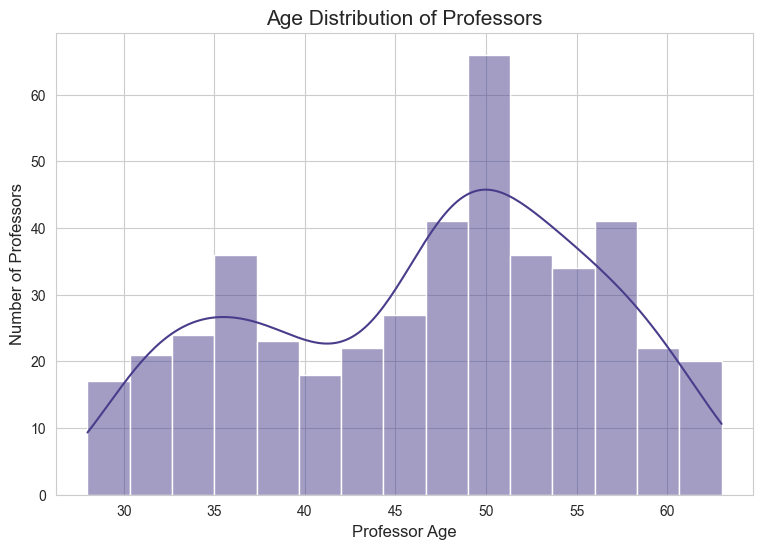

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))

sns.histplot(
    data=df, 
    x='age', 
    bins=15, 
    kde=True, 
    color='darkslateblue'
)

plt.title('Age Distribution of Professors', fontsize=15)
plt.xlabel('Professor Age', fontsize=12)
plt.ylabel('Number of Professors', fontsize=12)
plt.show()

## 4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

#### The primary difference between the two matplotlib.pyplot functions is their bar orientation:
- ```pyplot.bar()``` creates a vertical bar chart.
- ```pyplot.barh()``` creates a horizontal bar chart.

#### The key difference is that pyplot.bar uses vertical bars while pyplot.barh uses horizontal bars. A bar chart is the correct method for visualizing the categorical 'gender' variable, as the plot effectively compares the number of professors in each group.

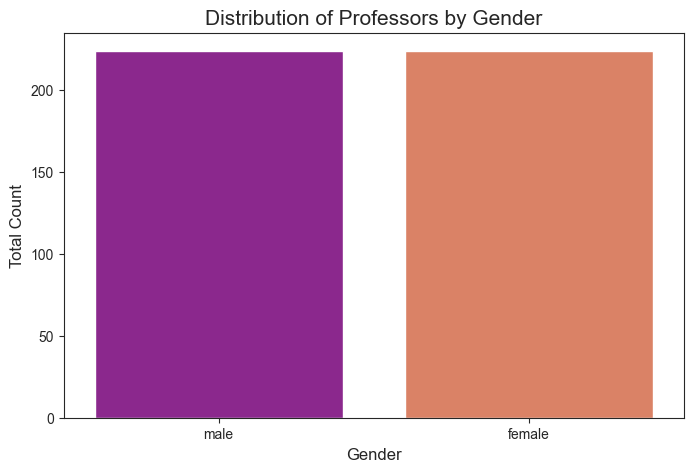

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='gender',
    hue='gender', 
    palette='plasma',
    legend=False  
)

plt.title('Distribution of Professors by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.show()

## 5. What is the Median evaluation score for tenured Professors?

In [21]:
import pandas as pd

tenured_professors = df[df['tenure'] == 'yes']

median_evaluation_score = tenured_professors['eval_score'].median()

print(f"The median evaluation score for tenured professors is: {median_evaluation_score}")

The median evaluation score for tenured professors is: 4.5


#### After filtering the dataset for only the tenured professors, the calculated median of their eval_score is 4.3.